In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv("Agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(88858, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.4+ MB


In [6]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [42]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Number_Weeks_Used']=le.fit_transform(df['Number_Weeks_Used'].astype(str))

In [7]:
#Checking Presence of NaN Values
df.isnull().values.any()

True

In [8]:
#As Null Values are Identified, Let's Check the Count Present 
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [10]:
#Checking Once Again Presence of NaN Values
df.isnull().values.any()

False

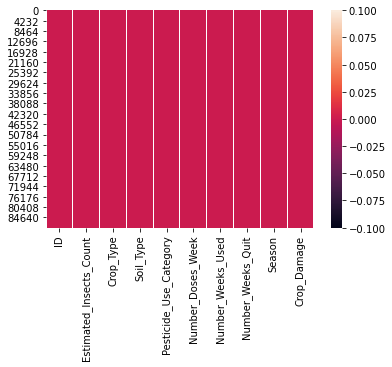

In [11]:
sb.heatmap(df.isnull())

In [13]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


Correaltion

In [14]:
dfcor=df.corr()
dfcor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


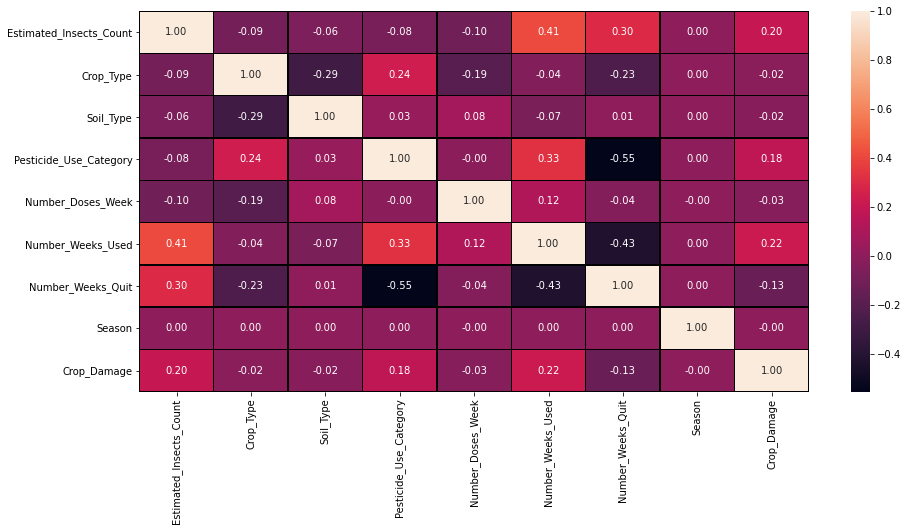

In [15]:
corr=df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

Estimated Insects Count, Pesticide Use Cateegory,Number Weeks Used are having positive correlation with Crop Damage

Uni Variant Analysis

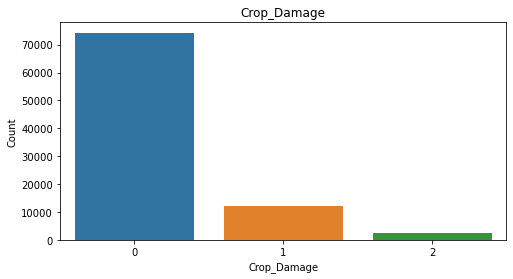

In [19]:
plt.subplots(figsize=(8,4))
sb.countplot(x='Crop_Damage',data=df)
plt.title("Crop_Damage")
plt.xlabel('Crop_Damage')
plt.ylabel('Count')
plt.show()

Crop Alive Count is More When Compare with Crop Damage 

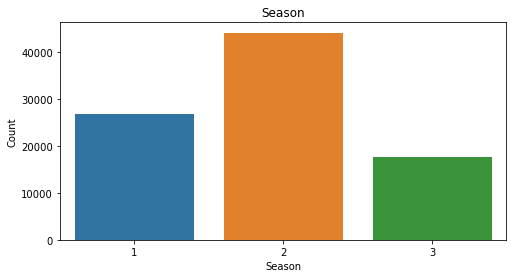

In [21]:
plt.subplots(figsize=(8,4))
sb.countplot(x='Season',data=df)
plt.title("Season")
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Season Category 2 having maximum fequency

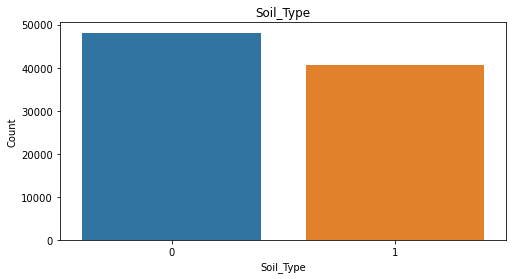

In [22]:
plt.subplots(figsize=(8,4))
sb.countplot(x='Soil_Type',data=df)
plt.title("Soil_Type")
plt.xlabel('Soil_Type')
plt.ylabel('Count')
plt.show()

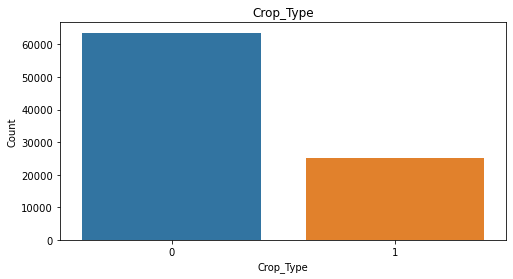

In [24]:
plt.subplots(figsize=(8,4))
sb.countplot(x='Crop_Type',data=df)
plt.title("Crop_Type")
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

Crop Type Zero Has Higher Frequency

Bi Variant Ananlysis

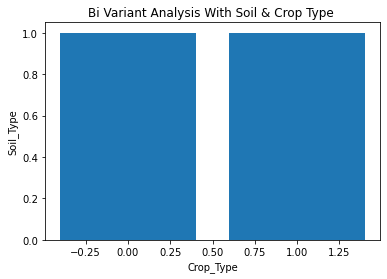

In [26]:
plt.bar(df["Crop_Type"],df['Soil_Type'])
plt.title("Bi Variant Analysis With Soil & Crop Type ")
plt.ylabel('Soil_Type')
plt.xlabel('Crop_Type')
plt.show()

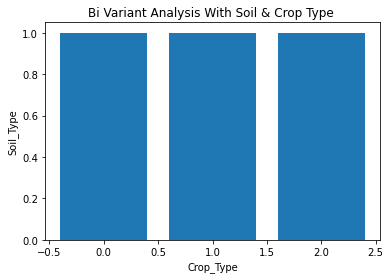

In [27]:
plt.bar(df["Crop_Damage"],df['Soil_Type'])
plt.title("Bi Variant Analysis With Soil & Crop Type ")
plt.ylabel('Soil_Type')
plt.xlabel('Crop_Type')
plt.show()

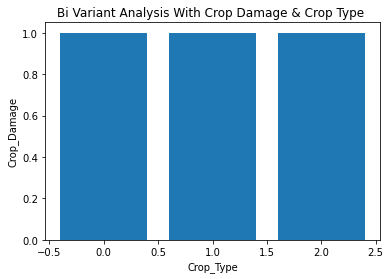

In [28]:
plt.bar(df["Crop_Damage"],df['Crop_Type'])
plt.title("Bi Variant Analysis With Crop Damage & Crop Type ")
plt.ylabel('Crop_Damage')
plt.xlabel('Crop_Type')
plt.show()

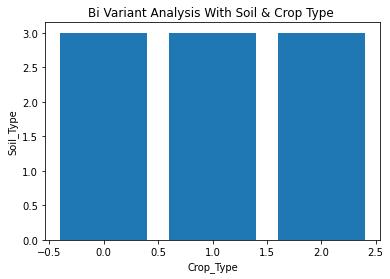

In [29]:
plt.bar(df["Crop_Damage"],df['Season'])
plt.title("Bi Variant Analysis With Soil & Crop Type ")
plt.ylabel('Soil_Type')
plt.xlabel('Crop_Type')
plt.show()

<ipython-input-30-56f0836b61fb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


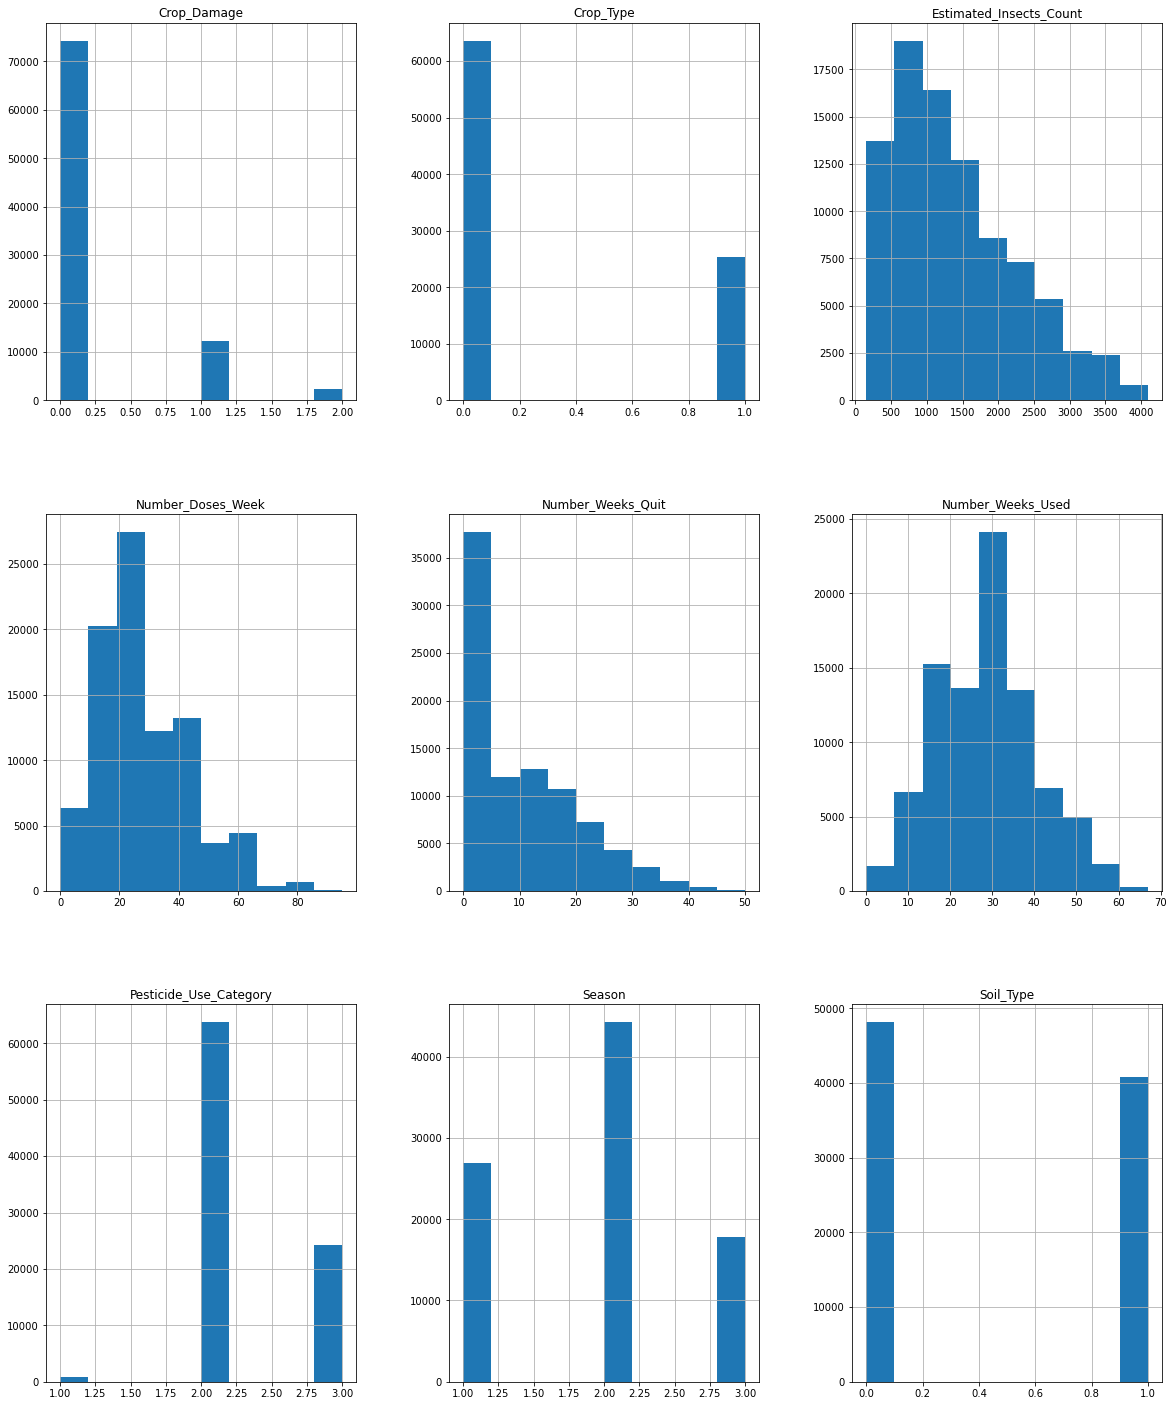

In [30]:
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df.hist(ax = ax)

import warnings
warnings.filterwarnings('ignore')

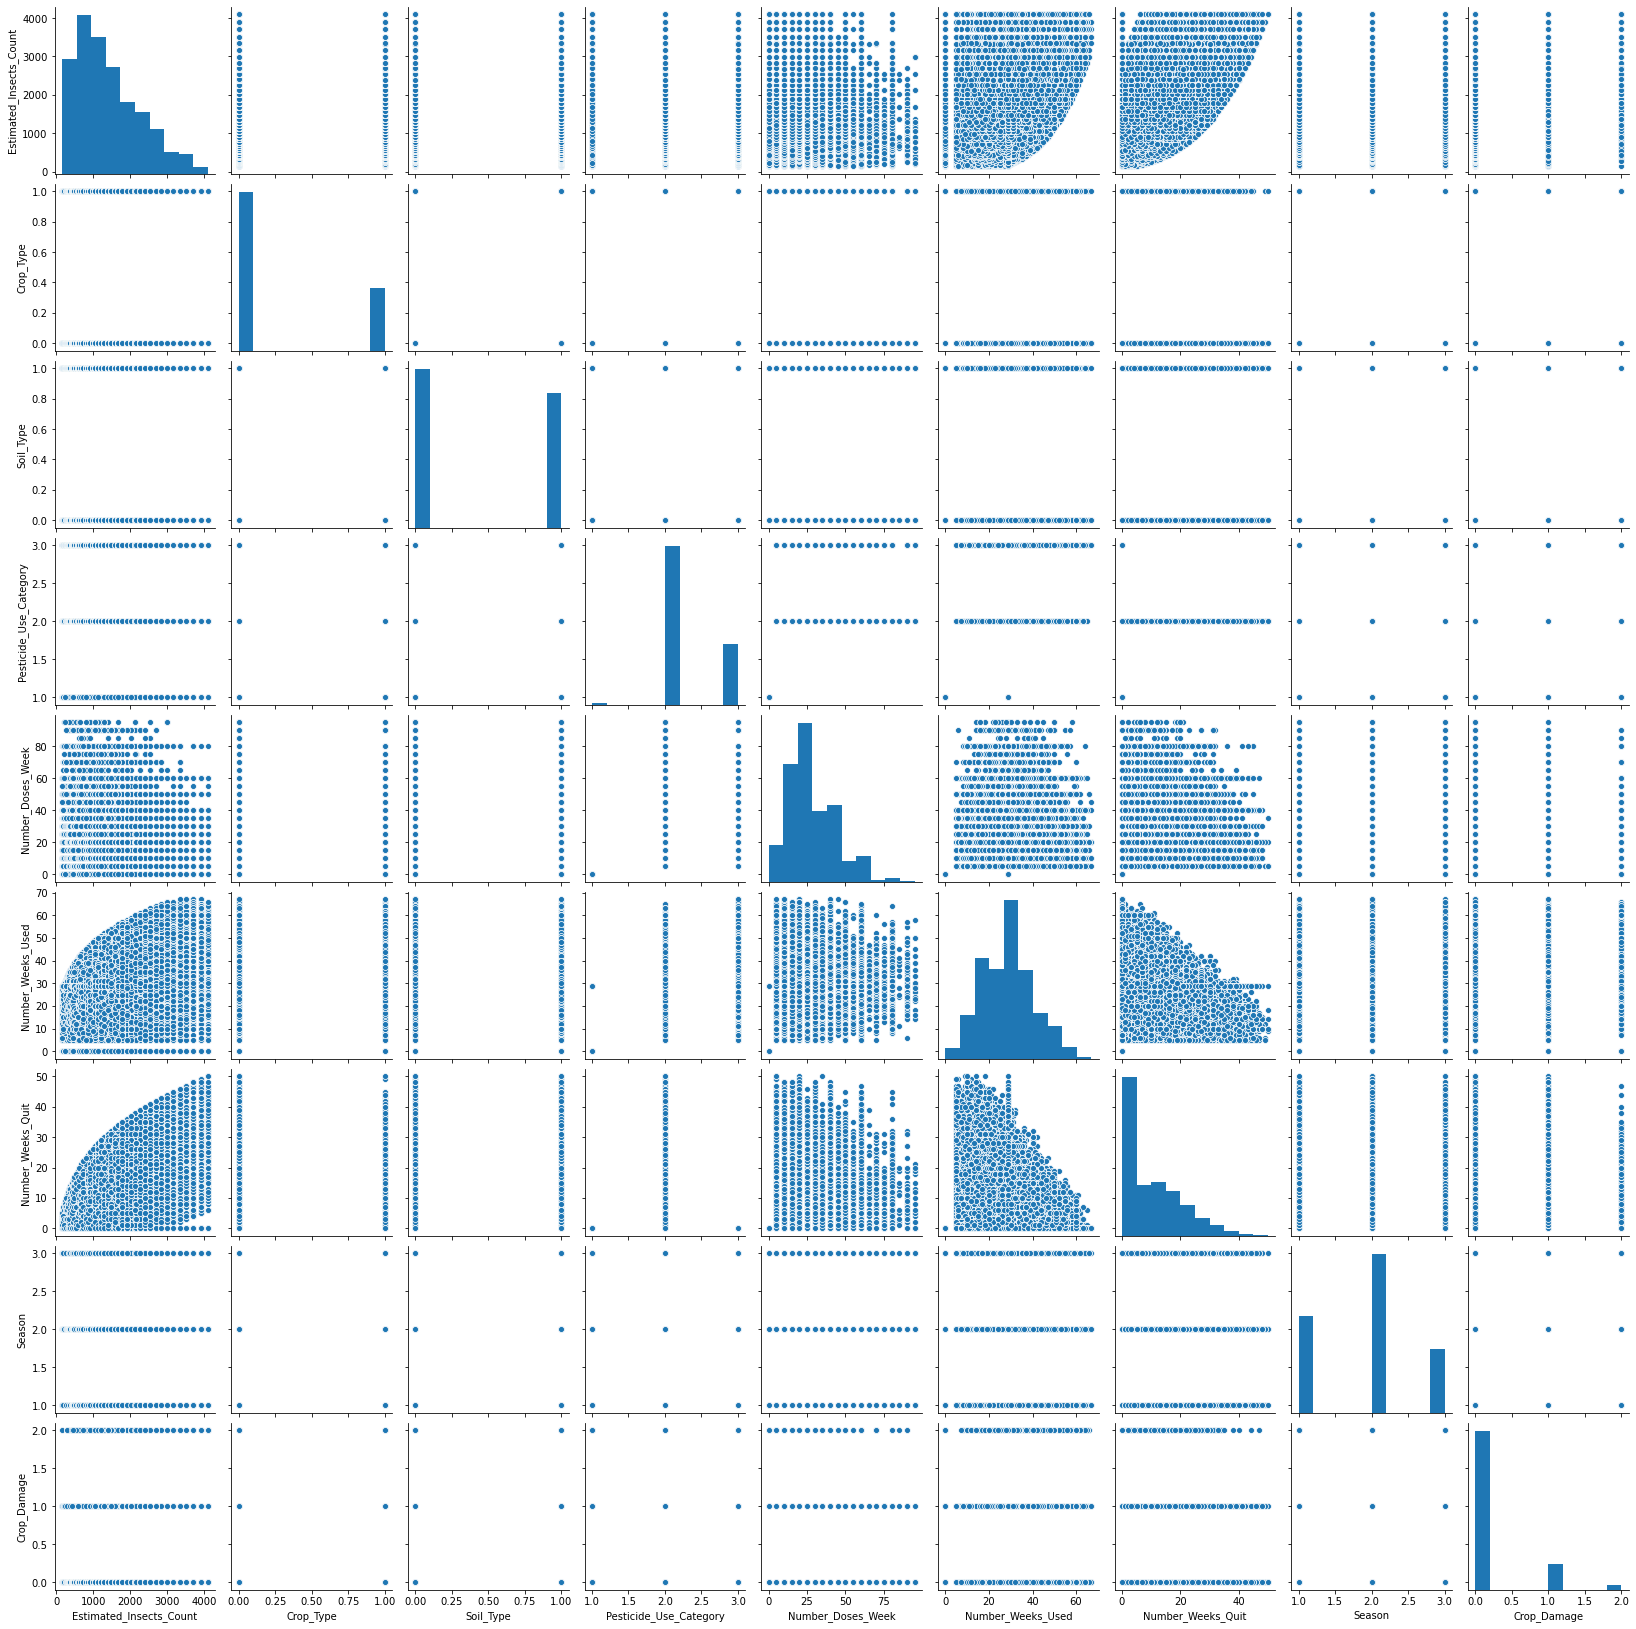

In [31]:
sb.pairplot(df)

Checking Outliers

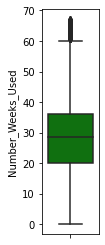

In [32]:
collist=df.select_dtypes(include=['float']).columns
ncol=10
nrows=9
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Checking The Skewness

In [43]:
round(df.skew(),2)

Estimated_Insects_Count   -0.23
Crop_Type                  0.96
Soil_Type                  0.17
Pesticide_Use_Category     0.59
Number_Doses_Week         -3.16
Number_Weeks_Used          0.29
Number_Weeks_Quit         -0.66
Season                    -0.20
Crop_Damage                1.92
dtype: float64

In [44]:
#treating the skewness with Square and Cube Root Method

df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<0.55:
            df[col]=np.cbrt(df[col])

In [99]:
y = df.iloc[:,-1]
y

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int32

In [86]:
x = df.iloc[:,2:9]
x

,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,1,0,0,0,0,1
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
88853,1,0,1,2,8,44,2
88854,1,0,1,2,16,38,0
88855,1,0,1,3,37,8,1
88856,1,0,1,2,21,18,2


In [87]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(88858, 10)

In [88]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print (df_new.shape)

(88858, 10)
(85185, 10)


In [89]:
loss_percentage=(88858-85185)/88858*100
print (round(loss_percentage,2),"%")

4.13 %


In [51]:
from sklearn.preprocessing import LabelEncoder

List1=['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage']
for val in List1:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

Transforming Data To Remove Skewness

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.28933198,  1.58634254, -0.92002085, ..., -2.54613523,
        -1.27276427, -1.33982849],
       [-2.21367798,  1.58634254, -0.92002085, ..., -2.54613523,
        -1.27276427,  0.22545712],
       [-1.916212  ,  1.58634254, -0.92002085, ..., -2.54613523,
        -1.27276427,  0.22545712],
       ...,
       [ 1.9733768 ,  1.58634254, -0.92002085, ...,  0.97816364,
         0.29191033,  0.22545712],
       [ 2.04065899,  1.58634254, -0.92002085, ..., -0.27525799,
         0.96621015,  1.46943576],
       [ 2.10789398,  1.58634254, -0.92002085, ...,  0.75588581,
         0.19296448,  1.46943576]])

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[ 1.58634254, -0.92002085, -2.73770132, ..., -2.08289654,
        -0.96862918, -1.27896183],
       [ 1.58634254, -0.92002085, -2.73770132, ..., -2.08289654,
        -0.96862918,  0.14692448],
       [ 1.58634254, -0.92002085, -2.73770132, ..., -2.08289654,
        -0.96862918,  0.14692448],
       ...,
       [ 1.58634254, -0.92002085, -0.57211628, ...,  0.98381657,
        -0.16059534,  0.14692448],
       [ 1.58634254, -0.92002085, -0.57211628, ..., -0.34232964,
         0.84944697,  1.57281078],
       [ 1.58634254, -0.92002085, -0.57211628, ...,  0.73516415,
        -0.26159957,  1.57281078]])

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [92]:
max_scr=0
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)

At Random State 60 . The Model Is Performing Very Well
At Random State:- 60
Training r2_score is 6.891861116411791
Testing r2_score is 6.89100759743444
At Random State 148 . The Model Is Performing Very Well
At Random State:- 148
Training r2_score is 6.889701013855132
Testing r2_score is 6.889517303940485
At Random State 323 . The Model Is Performing Very Well
At Random State:- 323
Training r2_score is 6.888553475846038
Testing r2_score is 6.890127801018187
At Random State 606 . The Model Is Performing Very Well
At Random State:- 606
Training r2_score is 6.892683888474838
Testing r2_score is 6.886522312526278
At Random State 692 . The Model Is Performing Very Well
At Random State:- 692
Training r2_score is 6.887542339072128
Testing r2_score is 6.893305288365359
At Random State 841 . The Model Is Performing Very Well
At Random State:- 841
Training r2_score is 6.892387698081848
Testing r2_score is 6.887892403137319
At Random State 843 . The Model Is Performing Very Well
At Random State:-

KeyboardInterrupt: 

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=1196) #Random state = 1196

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularisation

Lasso

In [95]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [96]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 6.853465448661722
R2_score is :- 6.6571020005829595


At CV :- 3
Cross Validation Score is :- 6.856037122852721
R2_score is :- 6.6571020005829595


At CV :- 4
Cross Validation Score is :- 6.852778065606338
R2_score is :- 6.6571020005829595


At CV :- 5
Cross Validation Score is :- 6.85482564812963
R2_score is :- 6.6571020005829595


At CV :- 6
Cross Validation Score is :- 6.860934351720566
R2_score is :- 6.6571020005829595


At CV :- 7
Cross Validation Score is :- 6.872568398463777
R2_score is :- 6.6571020005829595


At CV :- 8
Cross Validation Score is :- 6.841993913620385
R2_score is :- 6.6571020005829595


At CV :- 9
Cross Validation Score is :- 6.853899088505008
R2_score is :- 6.6571020005829595




In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 0.295650109688587
Mean Square Error: 0.1920284841059034
Root Mean Sqaured Error: 0.43821054768901146


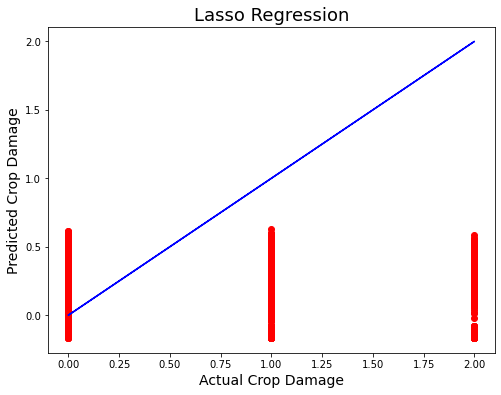

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Ridge Regression

In [103]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'random_state':[1,2,3,4,5,6,7,8,9]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'random_state': 1}


In [104]:
ridge=Ridge(alpha=0.001,random_state=1,fit_intercept=True,normalize= True)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
for j in range(2,10):
    rdscore = cross_val_score(rd,x_t,y,cv=j)
    rdc=rdscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",rdc*100)
    print ("R2_score is :-",rdc*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 6.853552015042813
R2_score is :- 6.853552015042813


At CV :- 3
Cross Validation Score is :- 6.856099157695968
R2_score is :- 6.856099157695968


At CV :- 4
Cross Validation Score is :- 6.852837125610961
R2_score is :- 6.852837125610961


At CV :- 5
Cross Validation Score is :- 6.854704665490681
R2_score is :- 6.854704665490681


At CV :- 6
Cross Validation Score is :- 6.860895378923858
R2_score is :- 6.860895378923858


At CV :- 7
Cross Validation Score is :- 6.87237823192643
R2_score is :- 6.87237823192643


At CV :- 8
Cross Validation Score is :- 6.841856343037694
R2_score is :- 6.841856343037694


At CV :- 9
Cross Validation Score is :- 6.85377821452058
R2_score is :- 6.85377821452058




In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Rigde Regression',fontsize=18)
plt.show()

In [108]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'splitter': 'random'}


In [106]:
dt=DecisionTreeRegressor(criterion='mse', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: -25.8971560856603
Cross Val Score: -29.500027427838422


In [109]:
print("Error:")
print("Mean Absolute Error:",round(mean_absolute_error(y_test,pred_decision),2))
print("Mean Square Error:",round(mean_squared_error(y_test,pred_decision),2))
print("Root Mean Sqaured Error:",round(np.sqrt(mean_squared_error(y_test,pred_decision)),2))

Error:
Mean Absolute Error: 0.27
Mean Square Error: 0.26
Root Mean Sqaured Error: 0.51


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Data Points are far away from Predicted Line

In [111]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 300}


In [112]:
rf=RandomForestRegressor(criterion='friedman_mse', n_estimators= 300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rd=rf.predict(x_test)
rfs=r2_score(y_test,pred_rd)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 0.6605394907233664
Cross Val Score: nan


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

Gredient Boosting Regressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [116]:
gbr=GradientBoostingRegressor(criterion='friedman_mse', loss='ls',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_random)
print("r2_score:",round(gbrs*100,2))
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',round(gbrc*100,2))

r2_score: 19.02
Cross Val Score: 19.31


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
sv=SVR(kernel='rbf',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2_score:",round(svs*100,2))
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',round(svc*100,2))


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Crop Damage',fontsize=14)
plt.ylabel('Predicted Crop Damage',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

Random Forest Regressor has Best Score of 66%

# Classification

In [ ]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=42)
model=lg()
model.fit(x1_train,y1_train)

In [ ]:
pred=model.predict(x1_test)
print(pred) 

In [ ]:
print ("Accuracy Score:",round(accuracy_score(y1_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y1_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y1_test,pred))

In [ ]:
mnb=MultinomialNB()
mnb.fit(x1_train,y1_train)
predmnb=mnb.predict(x1_test)
print('Accuracy Score:',round(accuracy_score(y1_test,predmnb),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,predmnb))
print('\n','Classification Report:','\n','\n',classification_report(y1_test,predmnb))

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x1_train,y1_train)
    svc.score(x1_train,y1_train)
    predsvc=svc.predict(x1_test)
    print('Accuracy Score:',round(accuracy_score(y1_test,predsvc),2),'\t')
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y1_test,predsvc))
    print('\n','Classification Report:','\n','\n',classification_report(y1_test,predsvc))

In [ ]:
import pickle
filename='AR_Project3.pkl'
pickle.dump(rd,open(filename,'wb'))